In [12]:
#5.4.3
import numpy as np

def fdweight(t, m):
    def weight(t, m, r, k):
         # 单重递归.
        # Input:
        '''
        t: 所有的坐标点列表。
        m: 我们要求的导数阶数。
		r: 代表“当前递归窗口中最右边那个点的索引”。
	    k: 我们正在计算哪一个点的权重（目标点的索引）。
		'''
        if (m < 0) or (m > r):  
            c = 0
        elif (m == 0) and (r == 0):  
            c = 1
        else:
            if k < r:
                denom = t[r] - t[k]
                c = (t[r] * weight(t, m, r-1, k) - m * weight(t, m - 1, r-1, k)) / denom
            else:
                beta = np.prod(t[r-1] - t[:r-1]) / np.prod(t[r] - t[:r])
                c = beta * (m * weight(t, m-1, r-1, r-1) - t[r-1] * weight(t, m, r-1, r-1)) 
        return c
    
    r = len(t) - 1
    w = np.zeros(t.shape)
    return np.array([ weight(t, m, r, k) for k in range(r+1) ])

f = lambda x: np.exp(-x)
df = lambda x: -np.exp(-x)
t = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
c = np.array([fdweight(t-0.5, m) for m in range(1, 5)]) #
errors = np.zeros(4)

for i in range(1, 5):
    approx_val = np.dot(c[i-1], f(t))
    exact_val = ((-1)**i) * np.exp(-0.5)
    errors[i-1] = abs(approx_val - exact_val)

    print(f"Order {i}: Approx={approx_val:.6f}, Exact={exact_val:.6f}, Error={errors[i-1]:.4e}")


Order 1: Approx=-0.606498, Exact=-0.606531, Error=3.2503e-05
Order 2: Approx=0.606520, Exact=0.606531, Error=1.0821e-05
Order 3: Approx=-0.612620, Exact=-0.606531, Error=6.0896e-03
Order 4: Approx=0.610586, Exact=0.606531, Error=4.0557e-03


h=0.5000, Error=3.4633e+00
h=0.2500, Error=5.5365e+00
h=0.1250, Error=1.5870e+00
h=0.0625, Error=2.5790e-01
h=0.0312, Error=5.1426e-02
h=0.0156, Error=1.1962e-02
h=0.0078, Error=2.9334e-03
h=0.0039, Error=7.2975e-04


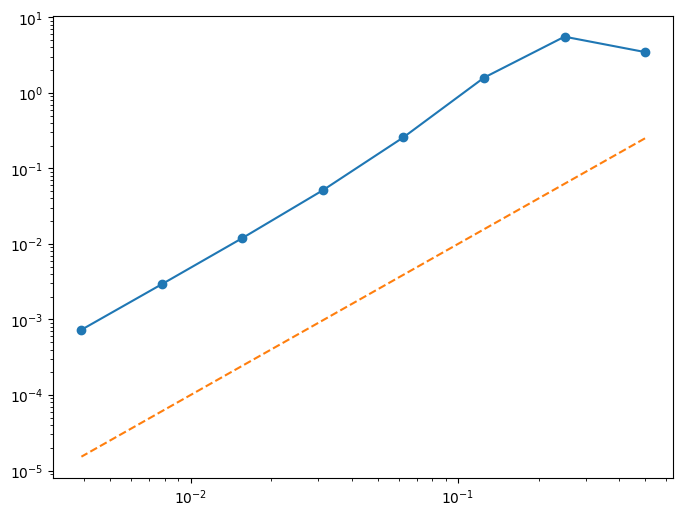

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 4 * np.pi / 5
f = lambda x: np.cos(x**3)
df = lambda x: -3 * x**2 * np.sin(x ** 3)
h = np.array([2**-i for i in range(1, 9)])
t = np.vstack([x0 - h, np.ones_like(h) * x0, x0 + h])
c = np.array([-0.5, 0, 0.5])
approx_vals = np.dot(c, f(t)) / h
exact_val = df(x0)
errors = np.abs(approx_vals - exact_val)

for i in range(len(h)):
    print(f"h={h[i]:.4f}, Error={errors[i]:.4e}")

# 6. 绘图 (双对数坐标)
plt.figure(figsize=(8, 6))

# 画误差线
plt.loglog(h, errors, 'o-', label='Finite Difference Error')

# 画参考线 (二阶收敛 O(h^2))
# 我们构造一个 y = h^2 的线，并乘一个系数让它在图上位置合适便于比较
plt.loglog(h, h**2, '--', label=r'Reference $O(h^2)$')